In [7]:
from models.ActivityTimeSeries import ActivityTimeSeries
from models.CGMData import CGMData
from models.HRTimeSeries import HRTimeSeries
from models.ActivityDistance import ActivityDistance
from models.ActivitySummary import ActivitySummary
from models.ActivityLog import ActivityLog
from models.BodyMetrics import BodyMetrics
from models.HRSummary import HRSummary
from models.HRZone import HRZone
from models.Age_Sex_YearsOnInsulin_AgeOnSet_Diagnosis import Age_Sex_YearsOnInsulin_AgeOnSet_Diagnosis

from utils.TS_DataFrame_Two_Columns import TS_DataFrame_Two_Columns

from utils.utils import matlabdt_converter, single_element_array, dateformat_tostring

In [8]:
def matlabdt_converter(matlab_array_dt):
    pydt = []
    for i in range(0, len(matlab_array_dt)):
        for j in range(0, len(matlab_array_dt[i])):
            matlab_datenum = matlab_array_dt[i][j]
            python_datetime = datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum % 1) - timedelta(
                days=366)
            pydt.append(python_datetime)
    return pydt

def single_element_array(array):
    singleElementArray = []
    for i in range(0, len(array)):
        for j in range(0, len(array[i])):
            element = array[i][j]
            singleElementArray.append(element)
    return singleElementArray



In [9]:
from datetime import datetime, timedelta
import json

import numpy as np
import json
import pandas as pd
# from pandas.core import datetools
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Observations of May 2017
from datetime import datetime
import pandas as pd


In [10]:
def matlabdt_converter(matlab_array_dt):
    pydt = []
    for i in range(0, len(matlab_array_dt)):
        for j in range(0, len(matlab_array_dt[i])):
            matlab_datenum = matlab_array_dt[i][j]
            python_datetime = datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum % 1) - timedelta(
                days=366)
            pydt.append(python_datetime)
    return pydt

def single_element_array(array):
    singleElementArray = []
    for i in range(0, len(array)):
        for j in range(0, len(array[i])):
            element = array[i][j]
            singleElementArray.append(element)
    return singleElementArray



In [11]:
filename = "../data/112.txt"
#getting all the data
with open(filename) as json_file:
    data = json.load(json_file)

#     ats = data['ActivityTimeSeries']
#     activityTimeSeries  =  ActivityTimeSeries(
#         ats['CaloriesOut'], ats['CaloriesOutdt'], ats['Steps'], ats['Stepsdt'],
#         ats['Floors'], ats['Floorsdt'], ats['Elevation'], ats['Elevationdt'],
#         ats['mets'], ats['level']
#     )

    ActivityTimeSeries = data['ActivityTimeSeries']
    ActivityTimeSeries_CaloriesOut = ActivityTimeSeries['CaloriesOut']
    ActivityTimeSeries_CaloriesOutdt = ActivityTimeSeries['CaloriesOutdt']

    CGM = data['CGMData']
    cgmData = CGMData(CGM['SG'],CGM['SGdt'], CGM['bolus_dt'],CGM['bolus_delivered_U'], CGM['bolus_programmed_U'],
                      CGM['bolus_duration_min'],CGM['bolus_type'], CGM['bolus_CR_setID'], CGM['BW_dt'],
                      CGM['BW_CR_setID'], CGM['BW_total_estimate_U'], CGM['BW_food_estimate_U'], CGM['BW_correction_estimate_U'],
                      CGM['BW_carb_input_g'], CGM['BW_BG_input_mgdL'], CGM['BW_active_insulin_U'], CGM['BW_carb_ratio_gU'],
                      CGM['BW_sensitivity_factor_mgdLU'], CGM['bg'], CGM['bgdt'], CGM['mbg'], CGM['mbgdt'],
                      CGM['pairsg'], CGM['mard'], CGM['bias'])

    hrt = data['HRTimeSeries']
    hrTimeSeries = HRTimeSeries(hrt['dt'], hrt['heartrate'])

    act_dist = data['ActivityDistance']
    activityDistance = ActivityDistance(act_dist['activityDate'], act_dist['Total'], act_dist['tracker'], act_dist['loggedActivities'],
                                        act_dist['veryActive'], act_dist['moderatelyActive'], act_dist['lightlyActivity'],
                                        act_dist['sedentaryActive'])


    act_sumry = data['ActivitySummary']
    activitySummary = ActivitySummary(act_sumry['ActivityDate'], act_sumry['steps'], act_sumry['calories'], act_sumry['VeryActiveMinutes'],
                                      act_sumry['fairlyActiveMinutes'], act_sumry['lightlyactivityminutes'], act_sumry['sedentaryMinutes'])


    act_log = data['ActivityLog']
    activityLog = ActivityLog(act_log['ACTIVITY_ID'], act_log['ACTIVITY_PARENT_ID'], act_log['CALORIES'], act_log['DESCRIPTION'], act_log['DISTANCE'],
                              act_log['DURATION'], act_log['HAS_START_TIME'], act_log['IS_FAVOURITE'], act_log['LOG_ID'], act_log['NAME'],
                              act_log['START_TIME'], act_log['STEPS'], act_log['ACTIVITY_DATE'])

    bdyMtrcs = data['BodyMetrics']
    bodyMetrics = BodyMetrics(bdyMtrcs['dt'], bdyMtrcs['Weight'], bdyMtrcs['BMI'], bdyMtrcs['Fat'])

    hrsmry = data['HRSummary']
    hrSummary = HRSummary(hrsmry['dt'], hrsmry['restingheartrate'])

    hr_Zone = data['HRZone']
    hrZone = HRZone( hr_Zone['dt'], hr_Zone['CalOut_OutOfRange'], hr_Zone['CalOut_FatBurn'], hr_Zone['CalOut_Cardio'], hr_Zone['CalOut_Peak'], hr_Zone['minutes_OutOfRange'],
    hr_Zone['minutes_FatBurn'], hr_Zone['minutes_Cardio'], hr_Zone['minutes_Peak'], hr_Zone['max_OutOfRange'], hr_Zone['max_FatBurn'], hr_Zone['max_Cardio'], hr_Zone['max_Peak'],
    hr_Zone['min_OutOfRange'], hr_Zone['min_FatBurn'], hr_Zone['min_Cardio'], hr_Zone['min_Peak'])

    #AgeOnset: Age during onset of diabetes
    #Diagnosis: ICD-9 code. Generally diabetes related codes start with 250
    age_sex_yearsOnInsulin_ageOnSet_diagnosis = Age_Sex_YearsOnInsulin_AgeOnSet_Diagnosis(data['Sex'], data['Age'], data['YearsOnInsulin'], data['AgeOnset'], data['diagnosis'])

    json_file.close()

In [12]:
activityTimeSeries.printMeanValues()

NameError: name 'activityTimeSeries' is not defined

In [ ]:
cgmData.printMeanValues()

In [84]:
print(hrTimeSeries.getHeartRate())



[[73], [72], [73], [72], [71], [72], [71], [72], [70], [71], [71], [71], [73], [74], [74], [75], [74], [73], [71], [70], [71], [72], [72], [71], [72], [71], [72], [72], [73], [74], [73], [74], [73], [73], [71], [71], [70], [71], [72], [71], [70], [71], [72], [72], [71], [72], [73], [73], [74], [73], [72], [71], [72], [71], [72], [72], [71], [71], [72], [72], [72], [73], [71], [72], [71], [70], [71], [73], [76], [74], [70], [71], [72], [70], [73], [70], [71], [71], [71], [85], [85], [74], [68], [66], [67], [69], [70], [69], [70], [72], [74], [70], [68], [70], [72], [76], [78], [77], [78], [76], [74], [73], [72], [75], [74], [72], [73], [76], [75], [74], [73], [75], [76], [73], [72], [70], [71], [73], [74], [72], [71], [72], [73], [75], [73], [69], [72], [73], [72], [71], [72], [73], [73], [74], [73], [72], [73], [74], [73], [75], [77], [78], [77], [79], [77], [76], [75], [76], [78], [77], [78], [79], [81], [79], [76], [75], [77], [75], [76], [77], [78], [77], [78], [77], [76], [77], [78

In [85]:
print(activityDistance.getActivityDate())


[736825.244, 736826.244, 736827.244, 736828.244, 736829.244, 736830.244, 736834.7873, 736835.7873, 736836.7873, 736837.7873, 736838.7873, 736839.7873, 736840.7873, 736841.7873, 736842.7873, 736843.7873, 736853.1057, 736854.0355, 736855.0336, 736856.0383, 736857.0319, 736858.0319, 736859.1332, 736860.0616, 736861.0658, 736862.0549, 736863.0586, 736864.0537, 736865.0547, 736866.0827, 736867.0278, 736868.0551, 736869.0575, 736870.0618, 736871.0633, 736872.0383, 736873.0685, 736874.0528, 736875.0561, 736876.0531, 736877.0602, 736878.059, 736879.0513, 736880.0513, 736881.1363, 736882.0327, 736883.037, 736884.0514, 736885.0537, 736886.0471, 736887.0564, 736888.0512, 736889.0521, 736890.0558, 736891.0552, 736892.0529, 736893.0606, 736894.0679, 736895.0605, 736896.0658, 736897.0456, 736898.0573, 736899.0535, 736900.0552, 736901.05, 736902.057, 736903.0504, 736904.0541, 736905.0479, 736906.057, 736907.053, 736908.0372, 736909.0232, 736910.0282, 736911.0302, 736912.027, 736913.0416, 736914.0299,

In [86]:
print(activitySummary.getActivityDate())


[['5/10/2017'], ['5/11/2017'], ['5/12/2017'], ['5/13/2017'], ['5/14/2017'], ['5/15/2017'], ['5/19/2017'], ['5/20/2017'], ['5/21/2017'], ['5/22/2017'], ['5/23/2017'], ['5/24/2017'], ['5/25/2017'], ['5/26/2017'], ['5/27/2017'], ['5/28/2017'], ['6/7/2017'], ['6/8/2017'], ['6/9/2017'], ['6/10/2017'], ['6/11/2017'], ['6/12/2017'], ['6/13/2017'], ['6/14/2017'], ['6/15/2017'], ['6/16/2017'], ['6/17/2017'], ['6/18/2017'], ['6/19/2017'], ['6/20/2017'], ['6/21/2017'], ['6/22/2017'], ['6/23/2017'], ['6/24/2017'], ['6/25/2017'], ['6/26/2017'], ['6/27/2017'], ['6/28/2017'], ['6/29/2017'], ['6/30/2017'], ['7/1/2017'], ['7/2/2017'], ['7/3/2017'], ['7/4/2017'], ['7/5/2017'], ['7/6/2017'], ['7/7/2017'], ['7/8/2017'], ['7/9/2017'], ['7/10/2017'], ['7/11/2017'], ['7/12/2017'], ['7/13/2017'], ['7/14/2017'], ['7/15/2017'], ['7/16/2017'], ['7/17/2017'], ['7/18/2017'], ['7/19/2017'], ['7/20/2017'], ['7/21/2017'], ['7/22/2017'], ['7/23/2017'], ['7/24/2017'], ['7/25/2017'], ['7/26/2017'], ['7/27/2017'], ['7/28

In [87]:
print(activityLog.getCalories())


{'_ArrayType_': 'double', '_ArraySize_': [0, 1], '_ArrayData_': None}


In [88]:
print(bodyMetrics.getWeight())


[104.32, 104.257, 104.291, 104.325, 104.258, 104.291, 104.324, 102.074, 101.789, 101.616, 101.502, 101.42, 101.362, 101.308, 101.276, 101.242, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925, 100.925]


In [89]:
print(hrSummary.getDt())


[[42865], [42866], [42867], [42868], [42869], [42870], [42874], [42875], [42876], [42877], [42878], [42879], [42880], [42881], [42882], [42883], [42893], [42894], [42895], [42896], [42897], [42898], [42899], [42900], [42901], [42902], [42903], [42904], [42905], [42906], [42907], [42908], [42909], [42910], [42911], [42912], [42913], [42914], [42915], [42916], [42917], [42918], [42919], [42920], [42921], [42922], [42923], [42924], [42925], [42926], [42927], [42928], [42929], [42930], [42931], [42932], [42933], [42934], [42935], [42936], [42937], [42938], [42939], [42940], [42941], [42942], [42943], [42944], [42945], [42946], [42947], [42948], [42949], [42950], [42951], [42952], [42953], [42954], [42955], [42956], [42957], [42958], [42959], [42960], [42961], [42962], [42963], [42964], [42965], [42966], [42967], [42968], [42969], [42970], [42971], [42972], [42973], [42974], [42975]]


In [13]:
print(age_sex_yearsOnInsulin_ageOnSet_diagnosis.getYearsOnInsulin())
print(age_sex_yearsOnInsulin_ageOnSet_diagnosis.getAge())
print(age_sex_yearsOnInsulin_ageOnSet_diagnosis.getSex())


0
41
F


In [14]:
print(hrZone.getDt())

[736825, 736826, 736827, 736828, 736829, 736830, 736834, 736835, 736836, 736837, 736838, 736839, 736840, 736841, 736842, 736843, 736853, 736854, 736855, 736856, 736857, 736858, 736859, 736860, 736861, 736862, 736863, 736864, 736865, 736866, 736867, 736868, 736869, 736870, 736871, 736872, 736873, 736874, 736875, 736876, 736877, 736878, 736879, 736880, 736881, 736882, 736883, 736884, 736885, 736886, 736887, 736888, 736889, 736890, 736891, 736892, 736893, 736894, 736895, 736896, 736897, 736898, 736899, 736900, 736901, 736902, 736903, 736904, 736905, 736906, 736907, 736908, 736909, 736910, 736911, 736912, 736913, 736914, 736915, 736916, 736917, 736918, 736919, 736920, 736921, 736922, 736923, 736924, 736925, 736926, 736927, 736928, 736929, 736930, 736931, 736932, 736933, 736934, 736935]


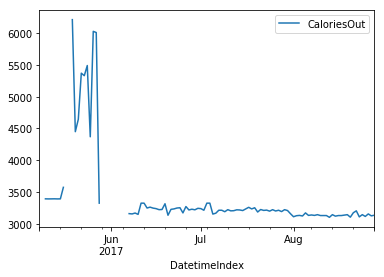

In [15]:
    ActivityTimeSeries = data['ActivityTimeSeries']
    ActivityTimeSeries_CaloriesOut = ActivityTimeSeries['CaloriesOut']
    ActivityTimeSeries_CaloriesOutdt = ActivityTimeSeries['CaloriesOutdt']

ActivityTimeSeries_CO_popped_val = single_element_array(ActivityTimeSeries_CaloriesOut)
ActivityTimeSeries_CaloriesOutpydt = matlabdt_converter(ActivityTimeSeries_CaloriesOutdt)
ActivityTimeSeries_CaloriesOut_df = pd.DataFrame({
    'DatetimeIndex': ActivityTimeSeries_CaloriesOutpydt,
    'CaloriesOut':ActivityTimeSeries_CO_popped_val})

# Convert df['date'] from string to datetime
# # ActivityTimeSeries_CaloriesOut_df = pd.DataFrame({
# #     'DatetimeIndex': ActivityTimeSeries_CaloriesOutpydt,
# #     'CaloriesOut':ActivityTimeSeries_CO_popped_val})
# ActivityTimeSeries_CaloriesOut_df['DatetimeIndex'] = pd.to_datetime(ActivityTimeSeries_CaloriesOut_df['DatetimeIndex'])



ActivityTimeSeries_CaloriesOut_df['DatetimeIndex'] = pd.to_datetime(ActivityTimeSeries_CaloriesOut_df['DatetimeIndex'])
ActivityTimeSeries_CaloriesOut_df.index = ActivityTimeSeries_CaloriesOut_df['DatetimeIndex']
del ActivityTimeSeries_CaloriesOut_df['DatetimeIndex']
AT_CaloriesOut_df = ActivityTimeSeries_CaloriesOut_df
# AT_CaloriesOut_df.resample('1D').mean()
AT_CaloriesOut_df.resample('1D').sum().plot()
plt.show()

In [112]:


activityTimeSeries.printMeanValues()

# print(age_sex_yearsOnInsulin_ageOnSet_diagnosis.getSex())
# print(hrZone.getDt())


# A=activityTimeSeries
# A.getCaloriesOutDt()
# A = TS_DataFrame_Two_Columns('CaloriesOut', activityTimeSeries.getCaloriesOut, matlabdt_converter(activityTimeSeries.getCaloriesOutdt))




Mean ActivityTimeSeries_CaloriesOut 
1.21971670739
Mean ActivityTimeSeries_step
0.476201957169
Mean ActivityTimeSeries_floors
0.000651862464183
Mean ActivityTimeSeries_elevation
0.00198644996483
Mean ActivityTimeSeries_mets
10.5446467197
Mean ActivityTimeSeries_level
0.0202259462296


In [113]:
activityTimeSeries.getCaloriesOut()

[[1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.156200051],
 [1.1562

In [119]:
activityTimeSeries.getCaloriesOut

<bound method ActivityTimeSeries.getCaloriesOut of <models.ActivityTimeSeries.ActivityTimeSeries object at 0x7f710fffea20>>

In [116]:
A = TS_DataFrame_Two_Columns('CaloriesOut', activityTimeSeries.getCaloriesOut, activityTimeSeries.getCaloriesOutDt)



AttributeError: 'ActivityTimeSeries' object has no attribute 'getCaloriesOutDt'